<a href="https://colab.research.google.com/github/elanghairilanam/Portfolio-Data-Science/blob/main/AIDS_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir('/content/gdrive/MyDrive/Dataset/AIDS')

In [7]:
os.listdir()

['AIDS_Classification_50000.xlsx']

In [9]:
aids_data = pd.read_csv("AIDS_Classification_50000.csv")

In [10]:
aids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [11]:
aids_data.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [12]:
#Menghapus data personal yang tidak dibutuhkan

kolom_hapus = ['race', 'gender']
aids_data = aids_data.drop(kolom_hapus, axis=1)

In [13]:
aids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  str2      50000 non-null  int64  
 12  strat     50000 non-null  int64  
 13  symptom   50000 non-null  int64  
 14  treat     50000 non-null  int64  
 15  offtrt    50000 non-null  int64  
 16  cd40      50000 non-null  int64  
 17  cd420     50000 non-null  int64  
 18  cd80      50000 non-null  int64  
 19  cd820     50000 non-null  int64  
 20  infected  50000 non-null  in

In [14]:
aids_data.duplicated().sum()

0

In [18]:
aids_data.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
5,564,2,37,71.87923,0,1,0,90,0,1,...,1,2,0,1,1,520,543,740,694,1
6,406,0,27,86.94414,0,1,0,100,0,1,...,1,2,0,0,0,274,314,1563,664,0
7,1044,1,36,69.46018,0,1,1,90,0,0,...,0,1,0,1,1,338,640,2572,741,0
8,522,0,52,67.55010,0,1,0,100,0,1,...,1,1,0,1,1,418,513,1496,622,0
9,494,2,39,93.49177,0,1,0,100,0,0,...,1,3,1,1,1,375,330,1339,1398,0


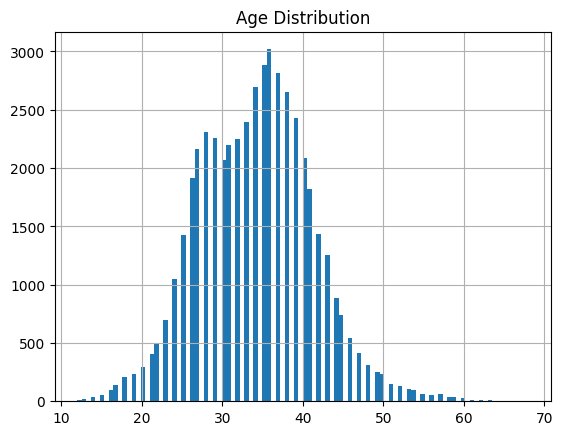

In [22]:
aids_data["age"].hist(bins = 100)
plt.title("Age Distribution")
plt.show()

<Axes: xlabel='age', ylabel='wtkg'>

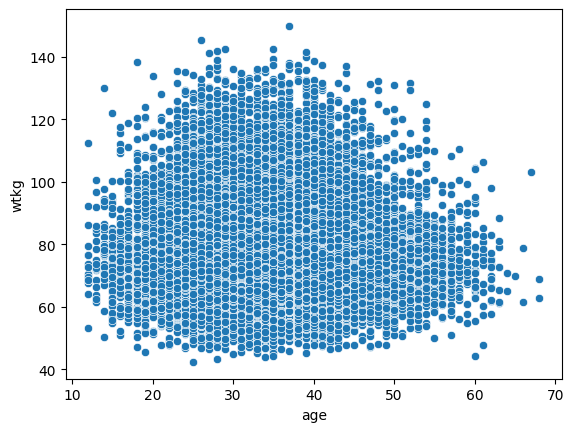

In [23]:
sns.scatterplot(data = aids_data,
                x = "age",
                y = "wtkg")

In [24]:
def select_columns(df : pd.DataFrame, features : list, target : list = "infected"):
  df = df
  x = df[features]
  y = df[target]

  return x,y


In [25]:
from sklearn.model_selection import train_test_split

In [28]:
features = aids_data.columns[:-1]

X, y = select_columns(aids_data, features = features)

In [30]:
#Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
#Scaling

minmax = MinMaxScaler()

In [34]:
minmax.fit(X_train)

MinMaxScaler()

In [38]:
def scaling(df, scaler):
  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = scaler.get_feature_names_out())

  return scaled_df

In [40]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [42]:
X_test_scaled.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,0.868670,1.000000,0.428571,0.269988,0.0,1.0,0.0,0.545455,0.0,1.0,0.302190,1.0,1.0,0.0,1.0,1.0,0.146237,0.190751,0.148684,0.209586
1,0.936481,0.666667,0.232143,0.314065,0.0,1.0,0.0,0.545455,0.0,1.0,0.147080,1.0,1.0,0.0,1.0,0.0,0.398925,0.442197,0.205921,0.126823
2,0.919313,0.000000,0.589286,0.198824,0.0,1.0,0.0,1.000000,0.0,0.0,0.012044,0.0,0.0,0.0,0.0,0.0,0.335484,0.158960,0.139693,0.270914
3,0.946781,1.000000,0.410714,0.217868,0.0,1.0,0.0,1.000000,0.0,1.0,0.000000,1.0,0.5,0.0,1.0,0.0,0.215054,0.470135,0.170833,0.207502
4,0.921030,0.000000,0.500000,0.469052,0.0,1.0,0.0,0.545455,0.0,1.0,0.001095,0.0,0.5,0.0,1.0,0.0,0.260215,0.310212,0.185307,0.394463


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()

In [80]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [81]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [82]:
y_test_pred_knn =  knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [100]:
#Evaluasi Mode

pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
infected,,
0,8208,2127
1,3102,1563


In [101]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
infected,,
0,7321,3014
1,2776,1889


In [102]:
# Logistic regresion

from sklearn.linear_model import LogisticRegression

In [90]:
reglog = LogisticRegression()

reglog.fit(X_train_scaled, y_train)

LogisticRegression()

In [91]:
#prediksi model

y_train_predict = reglog.predict(X_train_scaled)
y_test_predict = reglog.predict(X_test_scaled)

In [93]:
#Evaluasi Model

pd.crosstab(y_test, y_test_predict)

col_0,0,1
infected,,
0,9561,774
1,3609,1056


In [103]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [114]:
# Inisialisasi dan melatih model Random Forest
random_forest = RandomForestClassifier(n_estimators= 100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [115]:
#Prediksi Random Forest

y_test_pred_rs = random_forest.predict(X_test)

In [116]:
#Evaluasi Model

pd.crosstab(y_test, y_test_pred_rs)

col_0,0,1
infected,,
0,8170,2165
1,4008,657
